<a href="https://colab.research.google.com/github/labcnUC/SorterPipeline/blob/main/Colan_sorterpipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy h5py pandas numpy matplotlib probeinterface spikeinterface seaborn
!pip install sortingview
!pip install kilosort --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.7/924.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.1/655.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 8.4 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=b1a59b58eb1ca40aa2d509710c3b42fa6b967ee3954a51e5be3c9ff56cfe8372
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 26.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Dependencias.
# locales
import sys
sys.path.append('/content/drive/MyDrive/notebooks_colab/sorter')
from preprocessing_functions import read_rhd, get_recording, check_concatenation, process_artifacts, espigas, sorting_analyzer, create_folders

# externas
import scipy.io
%matplotlib inline
import h5py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import probeinterface as pi
import spikeinterface as si
import spikeinterface.widgets as sw
import spikeinterface.sorters as ss
import spikeinterface.exporters as exp
import seaborn as sns # <- Para graficos estadisticos

from pathlib import Path
from spikeinterface.extractors import read_intan
import spikeinterface.preprocessing as prep
from probeinterface import Probe, ProbeGroup

# global kwargs for parallel computing
job_kwargs = dict(
    n_jobs=-1,
    chunk_duration='1s',
    progress_bar=True,
)

si.set_global_job_kwargs(**job_kwargs)

### Defición de parametros.
para el ejemplo, se almacenan todos los pasos intermedios

In [4]:
# Nombre base de experimento, se crearán carpetas y archivos con este nombre.
base_name = 'PF07'
artifact_maze = "selected_"
artifact_sleep = 'selected_'
# Archivo de configuración del probegroup, existente en la carpeta "probes"
probegroup_file = '/content/drive/MyDrive/notebooks_colab/sorter/probes/anillo_probe.json'

# Configuración de carpetas de procesamiento
preprocess_folder = Path('/content/drive/MyDrive',base_name)

# Archivos de Excel para la información de registros
# como inicio se recomienda solo poner un dia en el excel de información de archivos, este es el punto de inicio para hacer una maquina de salchichas para todos los días del animal
folder_maze = Path(r'/content/drive/MyDrive/PF07/Maze')
folder_sleep = Path(r'/content/drive/MyDrive/PF07/Sleep')

In [6]:
# Definir carpetas de sorting.
# Single sorting
sorter_folder, analyzer_folder, phy_output_folder = create_folders(base_name)

# Group sorting
group_sorter_folder, group_analyzer_folder, group_phy_output_folder = create_folders(base_name, group=True)

# Procesar archivos
record_maze = get_recording(folder_maze, artifact_maze, probegroup_file)
record_sleep = get_recording(folder_sleep, artifact_sleep, probegroup_file)
recording = check_concatenation(record_maze, record_sleep)

INFO:SpikeSortingLogger:Archivo de probegroup utilizado: /content/drive/MyDrive/notebooks_colab/sorter/probes/anillo_probe.json


Archivo de probegroup utilizado: /content/drive/MyDrive/notebooks_colab/sorter/probes/anillo_probe.json


INFO:SpikeSortingLogger:Procesado 1 archivo .rhd: PF07_maze_Day09_240506_101500.rhd
INFO:SpikeSortingLogger:Grabación leída con 78980224 muestras y duración total de 3949.0112 segundos. Frecuencia de muestreo calculada: 20000 Hz.
INFO:SpikeSortingLogger:Ruta del archivo LAN: /content/drive/MyDrive/PF07/Maze/LAN_PF07_maze_Day09_240506_101500_500.mat
INFO:SpikeSortingLogger:Dataset encontrado: selected_CA1v_CA1d_RSC_PFC_2_7_11_13
INFO:SpikeSortingLogger:Filtro pasa banda aplicado: 500-9000 Hz.


Procesado 1 archivo .rhd: PF07_maze_Day09_240506_101500.rhd
Grabación leída con 78980224 muestras y duración total de 3949.0112 segundos. Frecuencia de muestreo calculada: 20000 Hz.
Ruta del archivo LAN: /content/drive/MyDrive/PF07/Maze/LAN_PF07_maze_Day09_240506_101500_500.mat
Dataset encontrado: selected_CA1v_CA1d_RSC_PFC_2_7_11_13
Filtro pasa banda aplicado: 500-9000 Hz.


INFO:SpikeSortingLogger:Probegroup configurado para la grabación.
INFO:SpikeSortingLogger:Artefactos removidos. Triggers utilizados: [  146320   148320   150320 ... 78973360 78975360 78977360]
INFO:SpikeSortingLogger:Procesamiento de archivo completado.
INFO:SpikeSortingLogger:Archivo de probegroup utilizado: /content/drive/MyDrive/notebooks_colab/sorter/probes/anillo_probe.json


Probegroup configurado para la grabación.
Artefactos removidos. Triggers utilizados: [  146320   148320   150320 ... 78973360 78975360 78977360]
Procesamiento de archivo completado.
Archivo de probegroup utilizado: /content/drive/MyDrive/notebooks_colab/sorter/probes/anillo_probe.json


INFO:SpikeSortingLogger:Procesado 1 archivo .rhd: PF07_Sleep_Day09_240506_114146.rhd
INFO:SpikeSortingLogger:Grabación leída con 73671424 muestras y duración total de 3683.5712 segundos. Frecuencia de muestreo calculada: 20000 Hz.
INFO:SpikeSortingLogger:Ruta del archivo LAN: /content/drive/MyDrive/PF07/Sleep/LAN_PF07_Sleep_Day09_240506_114146_500.mat
INFO:SpikeSortingLogger:Dataset encontrado: selected_CA1v_CA1d_RSC_PFC_2_7_11_13
INFO:SpikeSortingLogger:Filtro pasa banda aplicado: 500-9000 Hz.


Procesado 1 archivo .rhd: PF07_Sleep_Day09_240506_114146.rhd
Grabación leída con 73671424 muestras y duración total de 3683.5712 segundos. Frecuencia de muestreo calculada: 20000 Hz.
Ruta del archivo LAN: /content/drive/MyDrive/PF07/Sleep/LAN_PF07_Sleep_Day09_240506_114146_500.mat
Dataset encontrado: selected_CA1v_CA1d_RSC_PFC_2_7_11_13
Filtro pasa banda aplicado: 500-9000 Hz.


INFO:SpikeSortingLogger:Probegroup configurado para la grabación.
INFO:SpikeSortingLogger:Artefactos removidos. Triggers utilizados: [  237640   239640   241640 ... 73611920 73613920 73615920]
INFO:SpikeSortingLogger:Procesamiento de archivo completado.


Probegroup configurado para la grabación.
Artefactos removidos. Triggers utilizados: [  237640   239640   241640 ... 73611920 73613920 73615920]
Procesamiento de archivo completado.
Registros de Maze y Sueño concatenados exitosamente.


### Inspeccion de los resultados.
Revise:
Se haya realizado el procedimiento de concatenado.
Se removieron los artefactos.
Nombres de los canales.

importante: Con el fin de mejorar la visualización, los datos no estan escalados. Para presentarlos escalados (uV) defina return_scaled=True

ConcatenateSegmentRecording: 16 channels - 20.0kHz - 1 segments - 152,651,648 samples 
                             7,632.58s (2.12 hours) - int16 dtype - 4.55 GiB

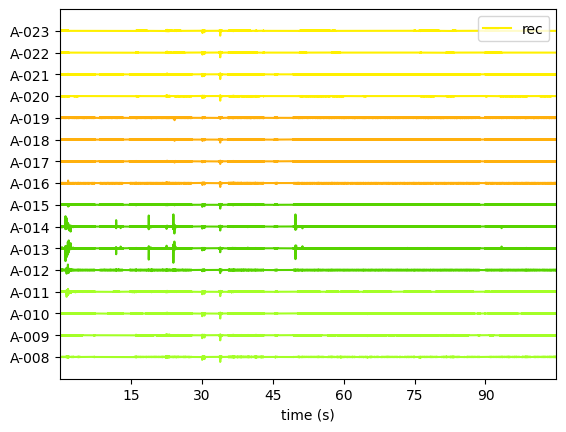

In [7]:
# plot and check spikes
mode = "line"
w = sw.plot_traces(recording=recording,
                   mode=mode, time_range=(0, 105), color_groups=True, return_scaled=False,
                  show_channel_ids=True, order_channel_by_depth=False)

recording

### Eliminacion de canales.
indique los canales a eliminar, para ello utilice el nombre ("Channel ID") que se le da en Intan. Observe el ejemplo.
Confirme que se haya realizado la eliminación ejecutando la celda anterior.

In [ ]:
bad_channels =["B-015", "B-016"]
recording=recording.remove_channels(bad_channels)

## Ejecutar un sorter
ejecutar Kilosort

### revisar parametros de entrada (configuracion)
parametros especificos para kilosort (pasables por kwargs):  
https://kilosort.readthedocs.io/en/latest/parameters.html  
https://github.com/MouseLand/Kilosort/blob/main/kilosort/parameters.py

In [ ]:
# limpiar la memoria de torch antes de procesar el sorter.
import torch
torch.cuda.empty_cache()

ss.get_default_sorter_params('kilosort4')

{'batch_size': 60000,
 'nblocks': 1,
 'Th_universal': 9,
 'Th_learned': 8,
 'do_CAR': True,
 'invert_sign': False,
 'nt': 61,
 'shift': None,
 'scale': None,
 'artifact_threshold': None,
 'nskip': 25,
 'whitening_range': 32,
 'highpass_cutoff': 300,
 'binning_depth': 5,
 'sig_interp': 20,
 'drift_smoothing': [0.5, 0.5, 0.5],
 'nt0min': None,
 'dmin': None,
 'dminx': 32,
 'min_template_size': 10,
 'template_sizes': 5,
 'nearest_chans': 10,
 'nearest_templates': 100,
 'max_channel_distance': None,
 'templates_from_data': True,
 'n_templates': 6,
 'n_pcs': 6,
 'Th_single_ch': 6,
 'acg_threshold': 0.2,
 'ccg_threshold': 0.25,
 'cluster_downsampling': 20,
 'cluster_pcs': 64,
 'x_centers': None,
 'duplicate_spike_ms': 0.25,
 'scaleproc': None,
 'save_preprocessed_copy': False,
 'torch_device': 'auto',
 'bad_channels': None,
 'clear_cache': False,
 'save_extra_vars': False,
 'do_correction': True,
 'keep_good_only': False,
 'skip_kilosort_preprocessing': False,
 'use_binary_file': None,
 'del

## Kilosort 4

In [8]:
params_kilosort4 = {## MAIN_PARAMETERS
                    'batch_size': 60000,
                    'nblocks': 0,
                    #'Th_universal': 9,
                    #'Th_learned': 8,
                    ## Preprocessing
                    'artifact_threshold': 1000,
                    ## SPIKE DETECTION
                    'min_template_size': 10,
                    'template_sizes':5,
                    'nearest_chans': 4,
                    'nearest_templates': 15,
                    'max_channel_distance': 60,
                    'templates_from_data': True,
                    'n_pcs':10,
                    #'Th_single_ch': 6,
                    ## Clustering
                        #'acg_threshold':0.15,
                        #'cluster_downsampling':10,
                    ## extras
                        #'binning_depth':4,
                        #'drift_smoothing':[0.3, 0.3, 0.3],
                    'skip_kilosort_preprocessing': False,} # se crea un diccionario donde se pueden pasar las variables modificadas al sorter.

### Sorting en bulto

In [9]:
sorter = ss.run_sorter(
                sorter_name='kilosort4',
                recording = recording,
                verbose=True,
                folder = sorter_folder,
                remove_existing_folder=True,  ## CUIDADO, SOBREESCRIBE LOS DATOS EN CASO DE HABER UNA CARPETA, PARA DESHABILITAR PONER =FALSE
                **params_kilosort4)

100%|██████████| 2/2 [00:32<00:00, 16.44s/it]


kilosort4 run time 476.34s


In [10]:
num_clusters, total_spikes= espigas(sorter)
print(f"Número total de clusters: {num_clusters}")
print(f"Número total de espigas: {total_spikes}")

Número total de clusters: 17
Número total de espigas: 726008


In [11]:
analyzer=sorting_analyzer(sorter, recording, output_folder=analyzer_folder)

estimate_sparsity:   0%|          | 0/7633 [00:00<?, ?it/s]

compute_waveforms:   0%|          | 0/7633 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/17 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/17 [00:00<?, ?it/s]

Compute : spike_amplitudes:   0%|          | 0/7633 [00:00<?, ?it/s]

In [12]:
exp.export_to_phy(sorting_analyzer=analyzer,
                  remove_if_exists=True,
                  copy_binary=True,
                  output_folder=phy_output_folder)

write_binary_recording:   0%|          | 0/7633 [00:00<?, ?it/s]

extract PCs:   0%|          | 0/7633 [00:00<?, ?it/s]

Run:
phy template-gui  /content/output/AN/kilosort/phy_PF07/params.py


Descargar archivos para curado manual

In [ ]:
from google.colab import files

!zip -r sorter_output.zip /content/output/AN/kilosort/phy_PF07

files.download("sorter_output.zip")

  adding: content/output/AN/kilosort/sorter_PF07/ (stored 0%)
  adding: content/output/AN/kilosort/sorter_PF07/spikeinterface_log.json (deflated 32%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/ (stored 0%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/spike_clusters.npy (deflated 83%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/spike_positions.npy (deflated 43%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/params.py (deflated 14%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/amplitudes.npy (deflated 16%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/pc_feature_ind.npy (deflated 68%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/cluster_KSLabel.tsv (deflated 54%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/channel_map.npy (deflated 43%)
  adding: content/output/AN/kilosort/sorter_PF07/sorter_output/pc_features.npy (deflated 7%)
  adding: conten

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
!kachery-cloud-init


https://kachery-gateway.figurl.org/registerClient/e3d0af7788247dbbd9cf33cfccef16ae1d7d43afd1d2c7630782919f10651254?signature=2d98036b57960567894ae43b257b53508b29e65fd29d3704fc19f390f25f13517764b55bb531c89b87ee5cbeae9ffa8c5d1949a6d8da933424aa7f88ae56800d&zone=default&label=3870c0d70f30

Click the above link to register this kachery cloud client. After pressing the "REGISTER CLIENT" button on the website, press [Enter] in this terminal to continue.


Checking...


Client initialized successfully.
Client ID: e3d0af7788247dbbd9cf33cfccef16ae1d7d43afd1d2c7630782919f10651254
Label: 3870c0d70f30
Owner: labcnUC

* Kachery-cloud is intended for collaborative sharing of data for scientific research. It should not be used for other purposes.


In [23]:
w_ss = sw.plot_sorting_summary(sorting_analyzer=analyzer, curation=True, backend="sortingview")

https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://c37a85876df1b0b188a802f2cdcb6ffd603644c8
